In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib. pyplot as plt
#需要用到的Python包
df = pd.read_excel("商城详细销售数据.xls")

In [2]:
#查看数据维度
df.shape

(9959, 20)

In [3]:
#查看数据信息
df.info()
#数据的类型大多数为Object类型，如果在后续的分析中有不合适的类型再进行类型转换

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   行 ID    9959 non-null   int64         
 1   订单 ID   9959 non-null   object        
 2   订单日期    9959 non-null   datetime64[ns]
 3   发货日期    9959 non-null   datetime64[ns]
 4   邮寄方式    9959 non-null   object        
 5   客户 ID   9959 non-null   object        
 6   客户名称    9959 non-null   object        
 7   细分      9959 non-null   object        
 8   城市      9959 non-null   object        
 9   省/自治区   9959 non-null   object        
 10  国家      9959 non-null   object        
 11  地区      9959 non-null   object        
 12  产品 ID   9959 non-null   object        
 13  类别      9959 non-null   object        
 14  子类别     9959 non-null   object        
 15  产品名称    9959 non-null   object        
 16  销售额     9959 non-null   float64       
 17  数量      9959 non-null   int64         
 18  折扣      

In [4]:
#查看各列缺失值
df.isna().sum()

行 ID     0
订单 ID    0
订单日期     0
发货日期     0
邮寄方式     0
客户 ID    0
客户名称     0
细分       0
城市       0
省/自治区    0
国家       0
地区       0
产品 ID    0
类别       0
子类别      0
产品名称     0
销售额      0
数量       0
折扣       0
利润       0
dtype: int64

In [5]:
#查看重复值
df.duplicated().sum()

0

In [6]:
#回顾下数据
df.head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",129.696,2,0.4,-60.704
1,2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",125.440,2,0.0,42.560
2,3,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",31.920,2,0.4,4.200
3,4,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良-17170,宋良,公司,镇江,江苏,中国,华东,办公用-用品-10003746,办公用品,用品,"Kleencut 开信刀, 工业",321.216,4,0.4,-27.104
4,5,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1375.920,3,0.0,550.200


In [7]:
import numpy as np

sales = df.groupby('类别').agg({'销售额': ['sum'], '利润': ['sum']}).reset_index()

# 现在访问修正后的变量名，并获取第一行数据
sales.iloc[0, :]

类别                 办公用品
销售额  sum    4865589.792
利润   sum     757640.352
Name: 0, dtype: object

In [8]:
sales=sales. sort_values(by=('利润','sum'),ascending=False)
sales.iloc[0,:]

类别                 办公用品
销售额  sum    4865589.792
利润   sum     757640.352
Name: 0, dtype: object

In [9]:
df['订单日期']=df['订单日期'].map(lambda x: pd.Timestamp(x))
df['月份']=df['订单日期'].map(lambda x: x. month)
df['年份']=df['订单日期'].map(lambda x: x. year)
df.head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,...,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润,月份,年份
0,1,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,...,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",129.696,2,0.4,-60.704,4,2018
1,2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,...,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",125.440,2,0.0,42.560,6,2018
2,3,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,...,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",31.920,2,0.4,4.200,6,2018
3,4,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良-17170,宋良,公司,镇江,江苏,...,办公用-用品-10003746,办公用品,用品,"Kleencut 开信刀, 工业",321.216,4,0.4,-27.104,12,2018
4,5,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,...,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1375.920,3,0.0,550.200,5,2017


In [10]:
df['年份'].unique()

array([2018, 2017, 2016, 2015], dtype=int64)

C:\Users\CT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

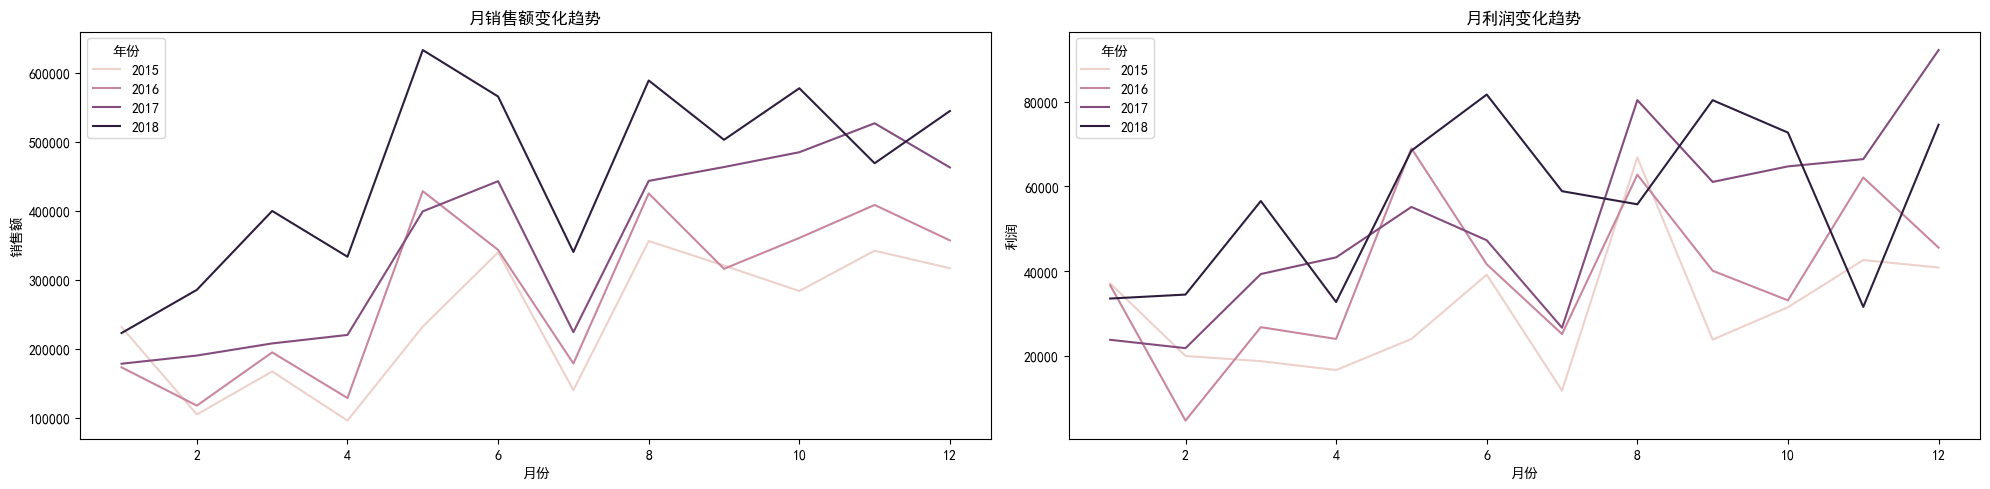

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif']=['SimHei'] # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False # 正常显示负号

# 使用字符串形式的聚合函数以避免FutureWarning
df_year = df.groupby(['年份', '月份']).agg({'销售额': 'sum', '利润': 'sum'}).reset_index()

fig = plt.figure(figsize=(20, 5))

fig.add_subplot(1, 2, 1)
sns.lineplot(data=df_year, x='月份', y='销售额', hue='年份')
plt.title('月销售额变化趋势')

fig.add_subplot(1, 2, 2)
sns.lineplot(data=df_year, x='月份', y='利润', hue='年份')
plt.title('月利润变化趋势')  # 修正了plt. title -> plt.title 的小错误

plt.tight_layout()
plt.show()

In [15]:
discount=df.groupby('类别').agg({'销售额':[np.sum],'利润':[np.sum],'折扣':[np.mean]})
discount.head()

C:\Users\CT\AppData\Local\Temp\ipykernel_14796\2757974627.py:1: FutureWarning: The provided callable <function sum at 0x0000021EE4DF58A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  discount=df.groupby('类别').agg({'销售额':[np.sum],'利润':[np.sum],'折扣':[np.mean]})
C:\Users\CT\AppData\Local\Temp\ipykernel_14796\2757974627.py:1: FutureWarning: The provided callable <function sum at 0x0000021EE4DF58A0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  discount=df.groupby('类别').agg({'销售额':[np.sum],'利润':[np.sum],'折扣':[np.mean]})
C:\Users\CT\AppData\Local\Temp\ipykernel_14796\2757974627.py:1: FutureWarning: The provided callable <function mean at 0x0000021EE4DF6980> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided call

,销售额,利润,折扣
,sum,sum,mean
类别,,,
办公用品,4865589.792,757640.352,0.085106
家具,5734340.829,638735.629,0.144875
技术,5469023.504,751162.944,0.123570


In [16]:
discount.iloc[:,1:].corr()

,,利润,折扣
,,sum,mean
利润,sum,1.000000,-0.802459
折扣,mean,-0.802459,1.000000


In [17]:
df.iloc[:,:-2].head()

,行 ID,订单 ID,订单日期,发货日期,邮寄方式,客户 ID,客户名称,细分,城市,省/自治区,国家,地区,产品 ID,类别,子类别,产品名称,销售额,数量,折扣,利润
0,1,US-2018-1357144,2018-04-27,2018-04-29,二级,曾惠-14485,曾惠,公司,杭州,浙江,中国,华东,办公用-用品-10002717,办公用品,用品,"Fiskars 剪刀, 蓝色",129.696,2,0.4,-60.704
1,2,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-信封-10004832,办公用品,信封,"GlobeWeis 搭扣信封, 红色",125.440,2,0.0,42.560
2,3,CN-2018-1973789,2018-06-15,2018-06-19,标准级,许安-10165,许安,消费者,内江,四川,中国,西南,办公用-装订-10001505,办公用品,装订机,"Cardinal 孔加固材料, 回收",31.920,2,0.4,4.200
3,4,US-2018-3017568,2018-12-09,2018-12-13,标准级,宋良-17170,宋良,公司,镇江,江苏,中国,华东,办公用-用品-10003746,办公用品,用品,"Kleencut 开信刀, 工业",321.216,4,0.4,-27.104
4,5,CN-2017-2975416,2017-05-31,2017-06-02,二级,万兰-15730,万兰,消费者,汕头,广东,中国,中南,办公用-器具-10003452,办公用品,器具,"KitchenAid 搅拌机, 黑色",1375.920,3,0.0,550.200


In [19]:
df['细分'].unique()

array(['公司', '消费者', '小型企业'], dtype=object)

In [20]:
customer=df.groupby(['细分'])['订单 ID'].count()
customer=pd.DataFrame(customer)
customer

,订单 ID
细分,
公司,3090
小型企业,1772
消费者,5097


In [21]:
customer_num=df.groupby(['细分'])['数量'].sum()
customer_num=pd.DataFrame(customer_num)
customer_num

,数量
细分,
公司,11581
小型企业,6780
消费者,19173


In [23]:
customer_sale=df.groupby(['细分'])['销售额'].sum()
customer_sale=pd.DataFrame(customer_sale)
customer_sale

,销售额
细分,
公司,5152793.296
小型企业,2891088.641
消费者,8025072.188


In [24]:
customer_profit=df.groupby(['细分'])['利润'].sum()
customer_profit=pd.DataFrame(customer_profit)
customer_profit

,利润
细分,
公司,681967.636
小型企业,412478.661
消费者,1053092.628


In [25]:
customer_dis=df.groupby(['细分'])['折扣'].mean()
customer_dis=pd.DataFrame(customer_dis)
customer_dis

,折扣
细分,
公司,0.109547
小型企业,0.097714
消费者,0.107524


In [29]:
customer_1 = df.groupby(['细分', '类别'])['订单 ID'].count()
customer_1=pd.DataFrame(customer_1)
customer_1

订单 ID
细分   类别         
公司   办公用品   1754
     家具      684
     技术      652
小型企业 办公用品   1001
     家具      408
     技术      363
消费者  办公用品   2932
     家具     1152
     技术     1013

In [30]:
customer_2=df.groupby(['细分','类别','子类别'])['订单 ID']. count()
customer_2=pd.DataFrame(customer_2)
customer_2

订单 ID
细分   类别   子类别       
公司   办公用品 信封     197
          器具     173
          收纳具    222
          标签     170
          用品     200
          系固件    177
          纸张     173
          美术     178
          装订机    264
     家具   书架     197
          桌子      53
          椅子     266
          用具     168
     技术   复印机    181
          电话     206
          设备      86
          配件     179
小型企业 办公用品 信封     102
          器具      91
          收纳具    160
          标签     112
          用品      91
          系固件    113
          纸张      92
          美术      92
          装订机    148
     家具   书架     118
          桌子      24
          椅子     157
          用具     109
     技术   复印机    101
          电话      96
          设备      67
          配件      99
消费者  办公用品 信封     318
          器具     295
          收纳具    411
          标签     276
          用品     310
          系固件    296
          纸张     288
          美术     267
          装订机    471
     家具   书架     294
          桌子      94
          椅子     436
          用具     328
     技术   复印机    286
          电话     281
          设备     164
          配件     282

In [32]:
df['地区'].unique()

array(['华东', '西南', '中南', '西北', '东北', '华北'], dtype=object)

In [33]:
customer=df.groupby(['地区'])['订单 ID'].count()
customer=pd.DataFrame(customer)
customer

,订单 ID
地区,
东北,1666
中南,2581
华东,2944
华北,1369
西北,478
西南,921


In [34]:
customer_num=df.groupby(['地区'])['数量'].sum()
customer_num=pd.DataFrame(customer_num)
customer_num

,数量
地区,
东北,6463
中南,9700
华东,11041
华北,5146
西北,1785
西南,3399


In [35]:
customer_sale=df.groupby(['地区'])['销售额'].sum()
customer_sale=pd.DataFrame(customer_sale)
customer_sale

,销售额
地区,
东北,2681567.469
中南,4137415.093
华东,4684506.442
华北,2447301.017
西北,815039.596
西南,1303124.508


In [36]:
customer_profit=df.groupby(['地区'])['利润'].sum()
customer_profit=pd.DataFrame(customer_profit)
customer_profit

,利润
地区,
东北,242191.509
中南,670885.313
华东,607218.682
华北,431053.217
西北,98553.476
西南,97636.728


In [37]:
customer_dis=df. groupby(['地区'])['折扣'].mean()
customer_dis=pd. DataFrame(customer_dis)
customer_dis

,折扣
地区,
东北,0.140906
中南,0.089946
华东,0.112466
华北,0.054127
西北,0.111715
西南,0.145711


In [39]:
customer_1=df.groupby(['地区','类别'])['订单 ID'].count()
customer_1=pd.DataFrame(customer_1)
customer_1

订单 ID
地区 类别         
东北 办公用品    919
   家具      381
   技术      366
中南 办公用品   1488
   家具      559
   技术      534
华东 办公用品   1701
   家具      657
   技术      586
华北 办公用品    803
   家具      313
   技术      253
西北 办公用品    264
   家具      116
   技术       98
西南 办公用品    512
   家具      218
   技术      191

In [40]:
customer_2=df.groupby(['地区','类别','子类别'])['订单 ID'].count()
customer_2=pd.DataFrame(customer_2)
customer_2

订单 ID
地区 类别   子类别       
东北 办公用品 信封     116
        器具      93
        收纳具    116
        标签      86
        用品     101
...            ...
西南 家具   用具      53
   技术   复印机     50
        电话      62
        设备      26
        配件      53

[102 rows x 1 columns]